<a href="https://colab.research.google.com/github/sauravrox/Liver-Failure-Prediction/blob/main/LiverFailPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas library
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
#creating an empty dataframe for our dataset
df = pd.DataFrame()

In [ ]:
from sklearn import preprocessing
from google.colab import drive
le = preprocessing.LabelEncoder()
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/ILPD.csv')
data['Gender'] = le.fit_transform(data['Gender'])
df = pd.DataFrame(data,columns=data.columns)

Mounted at /content/drive


In [ ]:
df[df.isna().any(axis=1)]
df['Albumin_and_Globulin_Ratio'].fillna((df['Albumin_and_Globulin_Ratio'].mean()), inplace=True)

In [ ]:
X = df.drop('Dataset', axis=1).values
y = df['Dataset'].values
# X = np.nan_to_num(X) 
# y = np.nan_to_num(y) 
print(X)
print(y)

[[65.    0.    0.7  ...  6.8   3.3   0.9 ]
 [62.    1.   10.9  ...  7.5   3.2   0.74]
 [62.    1.    7.3  ...  7.    3.3   0.89]
 ...
 [52.    1.    0.8  ...  6.4   3.2   1.  ]
 [31.    1.    1.3  ...  6.8   3.4   1.  ]
 [38.    1.    1.   ...  7.3   4.4   1.5 ]]
[1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2
 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 2 2 2
 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1
 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2
 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 1
 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1
 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 2 

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

my_decisiontree=DecisionTreeClassifier(random_state=2)
rftree = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)
xgb = XGBClassifier()

my_decisiontree.fit(X_train, y_train)
xgb.fit(X_train, y_train)
rftree.fit(X_train, y_train)

RandomForestClassifier(n_estimators=19, random_state=3)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_predict_dt = my_decisiontree.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_RF = rftree.predict(X_test)

accuracy={}
accuracy ['Decision Tree Accuracy']=accuracy_score(y_test, y_predict_dt)
accuracy ['Random Forest Accuracy']=accuracy_score(y_test, y_pred_RF)
accuracy ['XGBoost Accuracy']=accuracy_score(y_test, y_pred_xgb)

print(accuracy)

y_train_predict_dt = my_decisiontree.predict(X_train)
y_train_pred_xgb = xgb.predict(X_train)
y_train_pred_RF = rftree.predict(X_train)

accuracy1={}
accuracy1 ['Decision Tree Accuracy']=accuracy_score(y_train, y_train_predict_dt)
accuracy1 ['Random Forest Accuracy']=accuracy_score(y_train, y_train_pred_RF)
accuracy1 ['XGBoost Accuracy']=accuracy_score(y_train, y_train_pred_xgb)
print(accuracy1)

{'Decision Tree Accuracy': 0.6457142857142857, 'Random Forest Accuracy': 0.6971428571428572, 'XGBoost Accuracy': 0.6914285714285714}
{'Decision Tree Accuracy': 1.0, 'Random Forest Accuracy': 0.9950980392156863, 'XGBoost Accuracy': 0.9191176470588235}


In [ ]:
df.groupby('Dataset').size()

Dataset
1    416
2    167
dtype: int64

In [ ]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


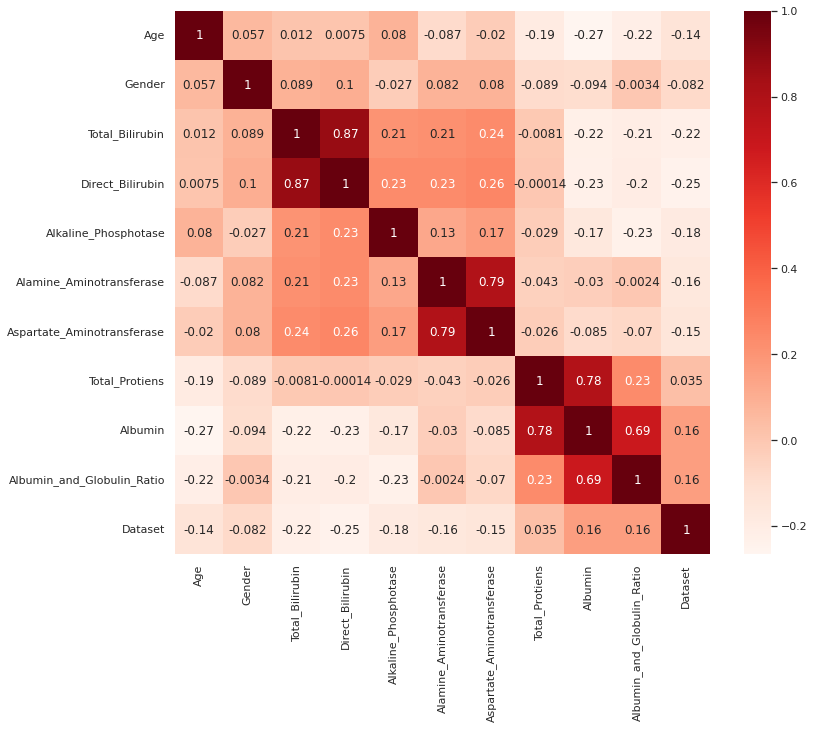

In [ ]:
import seaborn as sns; sns.set()

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 416, 2: 416})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#import KneighborsClassifier, DecisionTree, and Logestic Regression class from scikit learn

#instantiate my_decisiontree, my_Logreg and KNN as object for Decision tree , Logestic Regression and Knn and set k to 5 
my_logreg=LogisticRegressionCV(Cs=10,max_iter=2000,random_state=2)
knn = KNeighborsClassifier(n_neighbors=3) 
svclassifier = SVC(kernel='linear', probability=True)
my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [40,30], learning_rate='constant', random_state= 15, solver= 'adam',max_iter=2000,)

my_logreg.fit(X_train, y_train)
knn.fit(X_train, y_train) 
svclassifier.fit(X_train, y_train)
my_ANN.fit(X_train, y_train)

y_predict_KNN = knn.predict(X_test)
y_predict_logreg = my_logreg.predict(X_test)
y_pred_svm = svclassifier.predict(X_test)
y_pred_ANN = my_ANN.predict(X_test)

#calculate the accuracy
accuracy={}
accuracy ['KNN Accuracy']=accuracy_score(y_test, y_predict_KNN)
accuracy ['Logistic Regression Accuracy']=accuracy_score(y_test, y_predict_logreg)
accuracy ['SVM Accuracy']=accuracy_score(y_test, y_pred_svm)
accuracy ['Neural Network Accuracy']=accuracy_score(y_test, y_pred_ANN)

# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
print(accuracy)

y_train_predict_KNN = knn.predict(X_train)
y_train_predict_logreg = my_logreg.predict(X_train)
y_train_pred_svm = svclassifier.predict(X_train)
y_train_pred_ANN = my_ANN.predict(X_train)

#calculate the accuracy
accuracy1={}
accuracy1 ['KNN Accuracy']=accuracy_score(y_train, y_train_predict_KNN)
accuracy1 ['Logistic Regression Accuracy']=accuracy_score(y_train, y_train_predict_logreg)
accuracy1 ['SVM Accuracy']=accuracy_score(y_train, y_train_pred_svm)
accuracy1 ['Neural Network Accuracy']=accuracy_score(y_train, y_train_pred_ANN)

# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
print(accuracy1)

{'KNN Accuracy': 0.784, 'Logistic Regression Accuracy': 0.732, 'SVM Accuracy': 0.732, 'Neural Network Accuracy': 0.732}
{'KNN Accuracy': 0.8539518900343642, 'Logistic Regression Accuracy': 0.711340206185567, 'SVM Accuracy': 0.7061855670103093, 'Neural Network Accuracy': 0.8247422680412371}


In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

my_ANN_proba=cross_val_predict(my_ANN, X, y, cv=10,method='predict_proba')
rf_probs=cross_val_predict(rftree, X, y, cv=10,method='predict_proba')
svm_proba=cross_val_predict(svclassifier, X, y, cv=10,method='predict_proba')
lr_probs=cross_val_predict(my_logreg, X, y, cv=10,method='predict_proba')
knn_proba=cross_val_predict(knn, X, y, cv=10,method='predict_proba')
my_decisiontree_Proba=cross_val_predict(my_decisiontree, X, y, cv=10,method='predict_proba')
xgb_proba=cross_val_predict(xgb, X, y, cv=10,method='predict_proba')

In [61]:
from sklearn import metrics
counter = Counter(y)
print(counter)
fpr, tpr, thresholds = metrics.roc_curve(y, lr_probs[:,1], pos_label=1)
fprs, tprs, thresholds = metrics.roc_curve(y, svm_proba[:,1], pos_label=1)
fprk, tprk, thresholds = metrics.roc_curve(y, knn_proba[:,1], pos_label=1)
fprf, tprf, thresholds = metrics.roc_curve(y, rf_probs[:,1], pos_label=1)
fprd, tprd, thresholds = metrics.roc_curve(y, my_decisiontree_Proba[:,1], pos_label=1)
fprn, tprn, thresholds = metrics.roc_curve(y, my_ANN_proba[:,1], pos_label=1)
fprx, tprx, thresholds = metrics.roc_curve(y, xgb_proba[:,1], pos_label=1)

print(fpr)
print(tpr)

Counter({1: 416, 2: 416})
[0.         0.         0.         0.00240385 0.00240385 0.01682692
 0.01682692 0.02644231 0.02644231 0.03125    0.03125    0.03365385
 0.03365385 0.03605769 0.03605769 0.05048077 0.05048077 0.05769231
 0.05769231 0.06971154 0.06971154 0.06971154 0.07451923 0.07451923
 0.08894231 0.08894231 0.10576923 0.10576923 0.12259615 0.12259615
 0.12980769 0.12980769 0.13221154 0.13221154 0.14423077 0.14423077
 0.14663462 0.14663462 0.17067308 0.17067308 0.17307692 0.17307692
 0.17548077 0.17548077 0.18269231 0.18269231 0.19230769 0.19230769
 0.20192308 0.20192308 0.20432692 0.20432692 0.21153846 0.21153846
 0.21875    0.21875    0.23798077 0.23798077 0.24278846 0.24278846
 0.24519231 0.24519231 0.24759615 0.24759615 0.25721154 0.25721154
 0.26682692 0.26682692 0.27403846 0.27403846 0.27644231 0.27644231
 0.27884615 0.27884615 0.28365385 0.28365385 0.28605769 0.28605769
 0.29326923 0.29326923 0.29567308 0.29567308 0.31490385 0.31490385
 0.31971154 0.31971154 0.32211538 0.

In [62]:
# AUC:
AUCl = metrics.auc(fpr, tpr)
AUCs = metrics.auc(fprs, tprs)
AUCk = metrics.auc(fprk, tprk)
AUCf = metrics.auc(fprf, tprf)
AUCd = metrics.auc(fprd, tprd)
AUCn = metrics.auc(fprn, tprn)
AUCx = metrics.auc(fprx, tprx)

print(AUCl,AUCs,AUCk,AUCf,AUCd,AUCn,AUCx)


0.27208533653846156 0.26223014515532544 0.18061205621301774 0.13724459134615383 0.265625 0.22544147559171596 0.1670962000739645


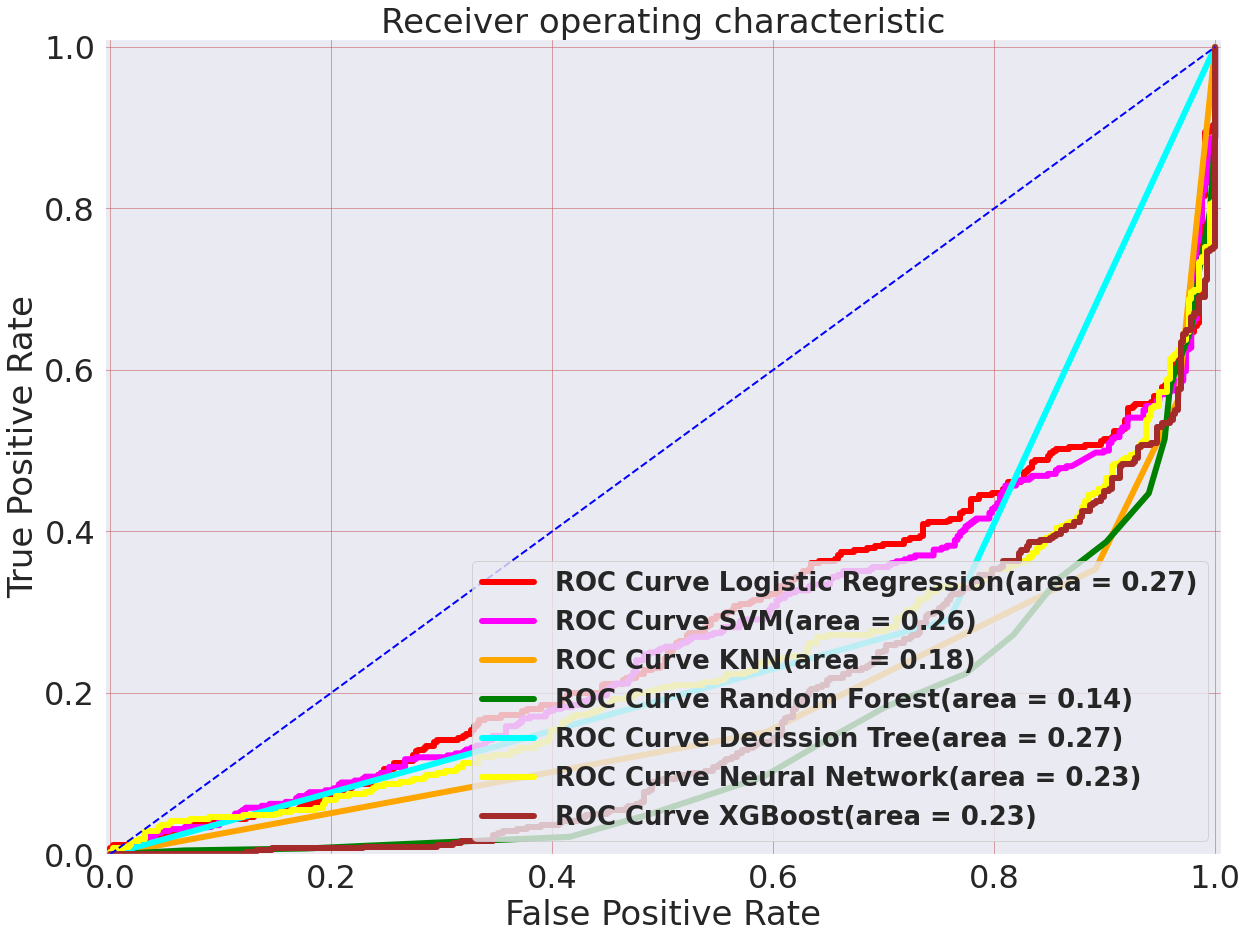

In [63]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:

import matplotlib.pyplot as plt


rc={'axes.labelsize': 34, 'font.size': 34, 'legend.fontsize': 34.0, 'axes.titlesize': 34}
plt.rcParams.update(**rc)

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

fig, ax=plt.subplots(figsize=(20,15))

ax.tick_params(direction='out', length=6, width=2, labelsize=32,
               grid_color='r', grid_alpha=0.5)
# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=6, 
         label='ROC Curve Logistic Regression(area = %0.2f)' % AUCl)

plt.plot(fprs, tprs, color='Magenta', lw=6, 
         label='ROC Curve SVM(area = %0.2f)' % AUCs)

plt.plot(fprk, tprk, color='Orange', lw=6, 
         label='ROC Curve KNN(area = %0.2f)' % AUCk)

plt.plot(fprf, tprf, color='Green', lw=6, 
         label='ROC Curve Random Forest(area = %0.2f)' % AUCf)

plt.plot(fprd, tprd, color='cyan', lw=6, 
         label='ROC Curve Decission Tree(area = %0.2f)' % AUCd)

plt.plot(fprn, tprn, color='yellow', lw=6, 
         label='ROC Curve Neural Network(area = %0.2f)' % AUCn)

plt.plot(fprx, tprx, color='brown', lw=6, 
         label='ROC Curve XGBoost(area = %0.2f)' % AUCn)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right",prop={'size':20},fontsize=32,handlelength=12,handleheight=2)
plt.legend(loc=4, prop={'size': 26,'weight':'bold','style':'normal'})
plt.savefig("AUC Comparison v2",dpi=300)

plt.show()